In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Esercizio3.1

In questa esercitazione vogliamo valutare il prezzo di un'$\textit{opzione europea}$.

Un'opzione è un contratto in cui una delle due parti assume un obbligo e l'altra un diritto. Ovviamente vi sarà un "costo" per l'assunzione di questo diritto che il compratore dell'opzione dovrà dare al venditore. Una possibile opzione è quella che appunto viene detta opzione europea dove:

- dato un certo asset con prezzo attuale $S(t)$, il diritto di comprare (ovvero quella che viene definita opzione $\textit{call}$) o di vendere (opzione $\textit{put}$) a un determinato prezzo $K$ viene garantito al compratore dell'opzione a un certo tempo $T$ nel futuro

Chiaramente il compratore eserciterà il suo diritto a comprare o a vendere solo se il prezzo garantito sarà conveniente rispetto al prezzo di mercato. Come già detto, al venditore verrà però corrisposto un prezzo in cambio del suo prendere l'obbligo, e capire il "giusto" prezzo per una certa opzione è il nostro obbiettivo.

Secondo la teoria di Black-Sholes, nel caso di mercato massimamente efficiente, ovvero con liquidità infinita (capacità di vendere o comprare un determinato prodotto a un determinato tempo) e senza frizione (costi di vendita), l'evoluzione di $S(t)$ è stocastica e, fissato il tasso di interesse $r$ e la volatilità $\sigma$, assume un comportamento paragonabile a un moto browniano geometrico (GBM). 

Esiste una soluzione analitica alla domanda "quale prezzo dovrà corrispondere il compratore al venditore di un'opzione europea call o put? ", ed esso può essere ricavato dalla soluzione analitica di Black e Scholes. Noi però vogliamo utilizzare un metodo MonteCarlo per stimare questa quantità.

Utilizziamo i seguenti parametri: 
- prezzo iniziale a $t=0$: $S(0)=100$
- tasso di interesse: $r=0.1$
- volatilità: $\sigma=0.25$

Per calcolare l'evoluzione al tempo $T=1$, utilizziamo due metodi diversi:
- Campionando direttamente il prezzo finale al tempo $T$, utilizzando la formula:
 $$S(t) = S(0) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)t+\sigma W(t)\right]$$
    dove $W(t)\sim\mathcal{N}(0,t)$, ovvero distribuito gaussianamente e $\mu=r$
- dividendo l'intervallo in sottointervalli discreti (100 nel nostro caso) e utilizzando la formula ricorsiva:
$$S(t_{i+1}) = S(t_i) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)(t_{i+1}-t_i)
    +\sigma Z_{i+1}\sqrt{t_{i+1}-t_i}\right]$$
    dove $Z_i \sim \mathcal{N}(0,1)$
    
Calcolato $S(T)$, possiamo valutare il costo per l'opzione put e l'opzione call al tempo $t=0$, ovvero:


- $p(0)=max(0,K-S(T))e^{-rT}$
- $c(0)=max(0,S(T)-K)e^{-rT}$

dove $K$ è detto $\textit{strike price}$ ed è fissato a $K=100$

Come spiegato, può essere svolto anche il calcolo teorico, il quale dà come risultato:
- call: $c(0)_{th} =14.975790778311286$
- put:  $p(0)_{th}=5.4595325819072364$

Come al solito utilizziamo il metodo del data blocking con $M=10^4$ blocchi per stimare le incertezze e studiare l'andamento dell'algoritmo.

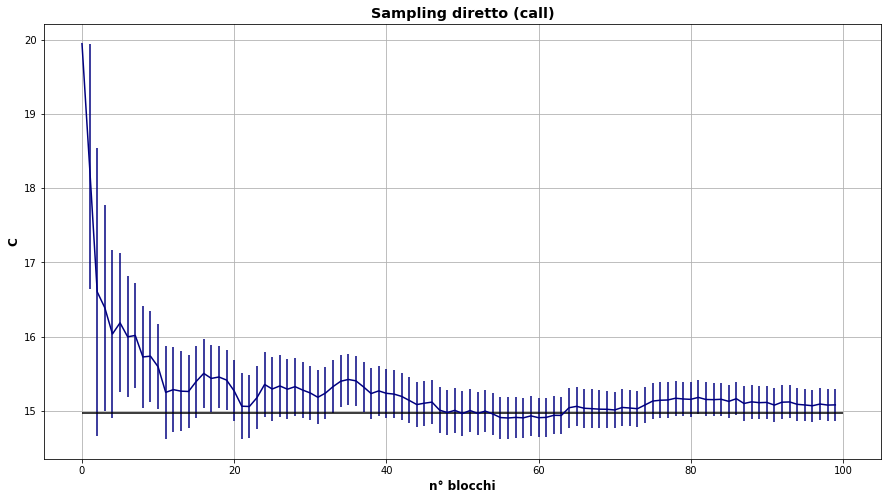

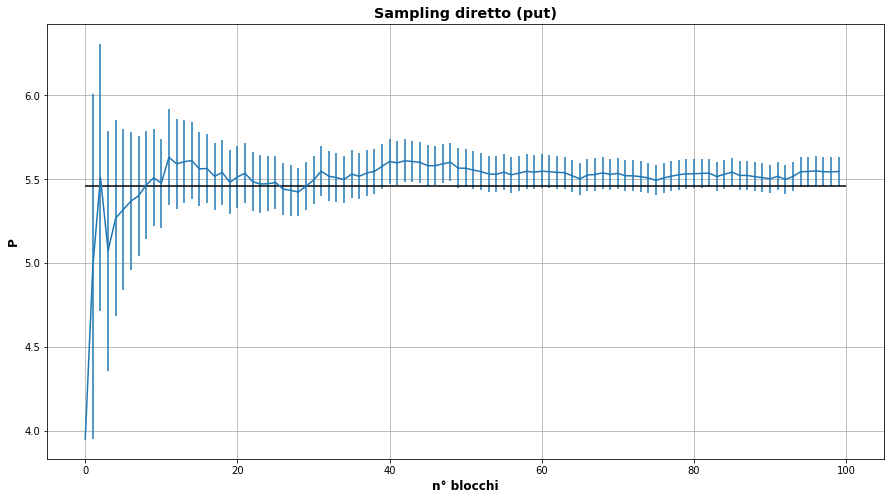

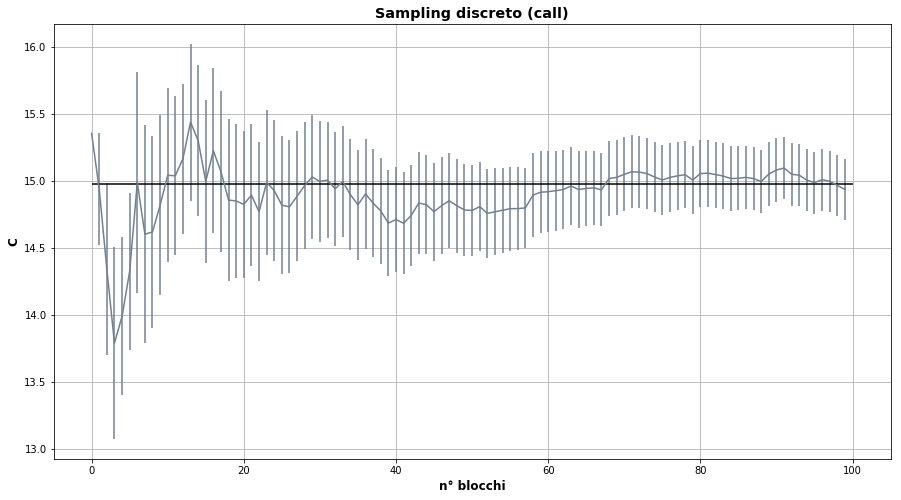

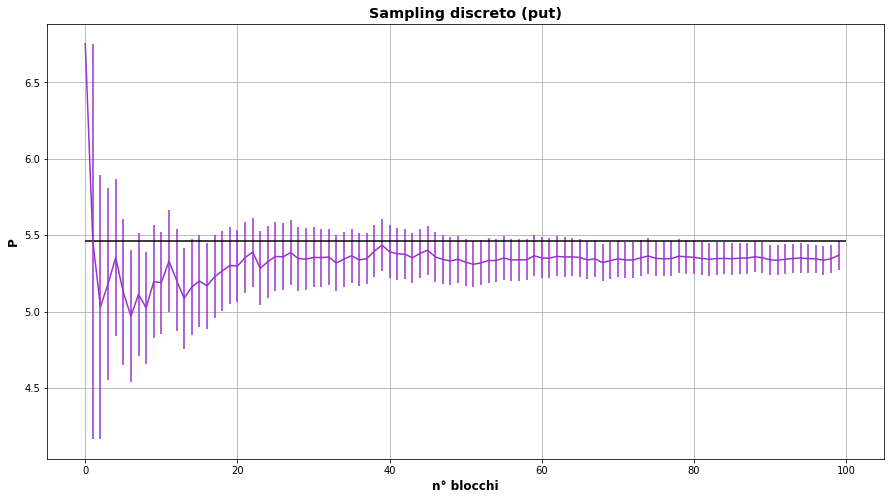

In [2]:
yd,errd=np.loadtxt("direct_call.dat",unpack=True)
yd2,errd2=np.loadtxt("direct_put.dat",unpack=True)
yds,err_ds=np.loadtxt("discrete_call.dat",unpack=True)
yds2,err_ds2=np.loadtxt("discrete_put.dat",unpack=True)

fig=plt.figure(figsize=(15, 8))


plt.errorbar(range(0,100),yd,yerr=errd, color='navy')
plt.xlabel('n° blocchi',size='large', weight='bold')
plt.ylabel('C',size='large', weight='bold')
plt.title("Sampling diretto (call)",size='x-large',weight="bold")
plt.hlines(14.975790778311, 0, 100)
plt.grid(True)

fig=plt.figure(figsize=(15, 8))
plt.errorbar(range(0,100),yd2,yerr=errd2)
plt.xlabel('n° blocchi',size='large', weight='bold')
plt.ylabel('P',size='large', weight='bold')
plt.title("Sampling diretto (put)",size='x-large',weight="bold")
plt.hlines(5.4595325819072364, 0, 100)
plt.grid(True)

fig=plt.figure(figsize=(15, 8))
plt.errorbar(range(0,100),yds,yerr=err_ds, color='slategrey')
plt.xlabel('n° blocchi',size='large', weight='bold')
plt.ylabel('C',size='large', weight='bold')
plt.hlines(14.975790778311, 0, 100)
plt.title("Sampling discreto (call)",size='x-large',weight="bold")
plt.grid(True)

fig=plt.figure(figsize=(15, 8))
plt.errorbar(range(0,100),yds2,yerr=err_ds2, color='darkorchid')
plt.xlabel('n° blocchi',size='large', weight='bold')
plt.ylabel('P',size='large', weight='bold')
plt.title("Sampling discreto (put)",size='x-large',weight="bold")
plt.hlines(5.4595325819072364, 0, 100)
plt.grid(True)
plt.show()

Come si può verificare dal grafico l'algoritmo converge al valore teorico. Nel caso dell'ultimo grafico le barre d'errore sono leggermente fuori dal valore teorico, ma bisogna anche considerare che rappresentano semplicemente una deviazione standard, pertanto può essere considerato comunque ragionevole.